In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m20, m30, m11, m21, c = m

    Ci = 0.308                                                      #g (kdp) /g (water)
    
    # Calculate necessary quantities
    
    T = 34 - (6) *(t / 7200)                                        # c
    
    c_sat = 9.3027*10**(-5)*T**2 - 9.7629*10**(-5)*T + 0.2087      # g (kdp)/g(water)
    
    delta_c = max(c - c_sat, 0)
    
    
    kg1 = 12.21                                                    # micrometer/sec
    g1 = 1.48
    kg2 = 100.75                                                   # micrometer/sec
    g2 = 1.74
    b = 1.5*10**(-10) 
    kb = 1                                                        # no./(Micrometer^3*sec)
    rho_c = 2.338*10**(-12)                                        # g/Micrometer^3
    mw = 1                                                         #g  (mass of solvent)

    G1 = kg1*(delta_c/c_sat)**g1                                   # (micrometer/sec) length
    G2 = kg2*(delta_c/c_sat)**g2                                   # (micrometer/sec) width
    B = kb*(delta_c/c_sat)**b                                      # no./(Micrometer^3*sec)
    
    dm00 = B
    dm10 = G1*m00
    dm01 = G2*m00
    dm20 = 2*G1*m10
    dm30 = 3*G1*m20
    dm11 = G1*m01 + G2*m10
    dm21 = 2*G1*m11 + G2*m20
    
    dc = -(rho_c/mw)*(2*G1*(m11 - m20) + G2*m20)
    
    return [dm00, dm10, dm01, dm20, dm30, dm11, dm21, dc]

t_span = (0, 7200)
num_points = 7200
initialConditions = [0, 0, 0, 0, 0, 0, 0, 0.308]

sol = solve_ivp(
    lambda t, m: generateODE(t, m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

Text(0, 0.5, 'Concentration g (kdp)/g (water)')

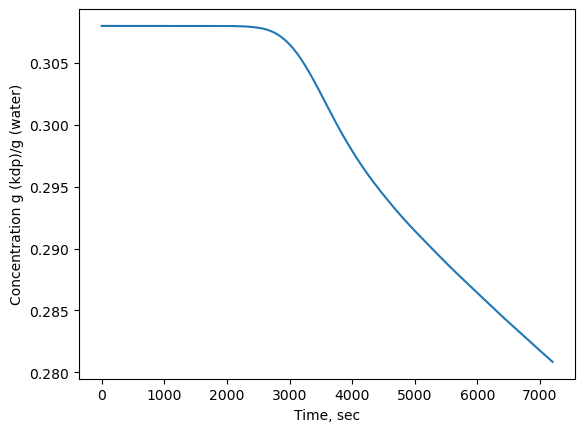

In [2]:
plt.plot(sol.t,sol.y[7])
plt.xlabel("Time, sec")
plt.ylabel("Concentration g (kdp)/g (water)")